# UCI Evaluation Report: NIH Loan Repayment Workshop

The ICTS frequently holds workshops
regarding NIH’s Loan Repayment Program. The target audience of this workshop is primarily
pre and post-doctoral scholars and early career researchers at UCI.
The NIH Loan Repayment Programs (LRPs) are designed to help repay educational debt for
health professionals with doctoral-level degrees conducting biomedical or behavioral research.
This information session hosted by the Institute of Clinical and Translational Science (ICTS) is
intended for post-doctoral fellows and junior faculty interested in preparing an application for the
NIH LRPs.

This section includes:
• The program/event that the survey was created for
• A short description of the program/event
• The date/duration of the program/event
• The survey’s target audience
• The number of people that received the survey invitation
• The number of respondents (as well as the response percentage: %, N)
• If demographic information is collected for this survey, describe the general population of the respondents
• Key points regarding the evaluative data should be highlighted, which could include data regarding general program/event
satisfaction or specific survey items and qualitative data that are important to showcase

## Initializing and Preparing Data

In [626]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [627]:
data = pd.read_csv('/Users/sarachong/Downloads/TEMPLATECOPYNIHLoanR_DATA_2026-01-13- RAW Data.csv')
data = data.drop(columns=['loan_repayment_workshop_complete', 'record_id']); data.head()

,uci_affiliation,uci_affiliation_other,uci_department,loan_process,necessary_tools,enjoyed,relevant,organized,length,valuable,implement_workshop,strategies,use_info_learned_workshop,impression_workshop,suggestions_workshop
0,2,NaN,Social Ecology,6,5,7,6,6,7,7,5,6,I will likely apply next year this will help m...,it was very accessible and welcoming,not at the moment perhaps as I apply.
1,1,NaN,Medicine,5,6,7,7,7,7,7,5,7,NaN,NaN,NaN
2,4,Post doc,Biomedical Engineering,7,7,7,7,7,7,7,7,7,I will evaluate my options for applying to thi...,The workshop is a great resource for the UCI r...,NaN
3,4,Postdoc,Otolaryngology-Head and Neck Surgery,6,6,5,5,6,7,6,6,6,NaN,NaN,NaN
4,4,Administrative Staff,ICTS,7,7,7,7,7,7,7,7,7,NaN,NaN,NaN


In [628]:
data = data.replace('.', np.nan)
data = data.replace('Post doc', 'Postdoc')
change = ['length', 'valuable', 'implement_workshop', 'strategies']
for i in change:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    data[i] = data[i].fillna(round(data[i].mean()))
    data[i] = data[i].astype(int)

In [629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   uci_affiliation            13 non-null     int64 
 1   uci_affiliation_other      3 non-null      object
 2   uci_department             13 non-null     object
 3   loan_process               13 non-null     int64 
 4   necessary_tools            13 non-null     int64 
 5   enjoyed                    13 non-null     int64 
 6   relevant                   13 non-null     int64 
 7   organized                  13 non-null     int64 
 8   length                     13 non-null     int64 
 9   valuable                   13 non-null     int64 
 10  implement_workshop         13 non-null     int64 
 11  strategies                 13 non-null     int64 
 12  use_info_learned_workshop  4 non-null      object
 13  impression_workshop        4 non-null      object
 14  suggestions_

To start, I cleaned the data to ensure it is ready for evaluation. Because the dataset is fairly small, it is easy to identify any changes needed to be made. First, I removed two columns that were not necessary for the analysis: the `loan_repayment_workshop_complete` column and the `record_id` column, as these variables do not have meaningful insights into workshop effectiveness or participant feedback. Next, I addressed missing data by identifying unfilled survey responses and filling these missing values with the average response for each respective question, rounded to the nearest whole number. This helps keeps all survey answers while maintaining the rating scales. Finally, I verified that all variables had the correct data types. With these data cleaning steps completed, the dataset is now ready for analysis of the NIH Loan Repayment Program workshop evaluation.

## Analyzing the Data

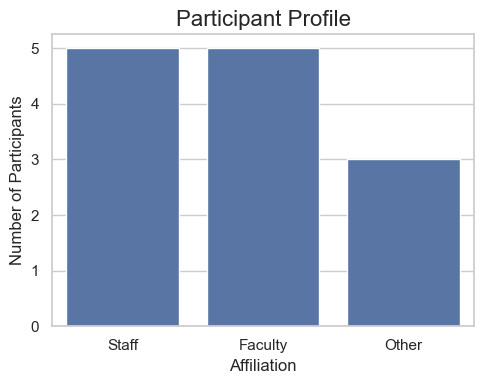

Departments: Social Ecology, Medicine, Biomedical Engineering, Otolaryngology-Head and Neck Surgery, ICTS, Stem Cell, COHS, School of Nursing, Public Health, Psychiatry and Human Behavior , Psychiatry, School of Nursing, Molecular Biology & Biochemistry


In [636]:
affiliation_dict = {1: 'Faculty', 2: 'Staff', 3:'Student', 4:'Other'}
data['affiliation'] = data['uci_affiliation'].map(affiliation_dict)
affiliation = data['affiliation'].value_counts().reset_index()
affiliation.columns = ['Affiliation', 'Count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
barplot = sns.barplot(data=affiliation, x='Affiliation', y='Count')

plt.title('Participant Profile', fontsize=16)
plt.xlabel('Affiliation', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

plt.tight_layout()
plt.show()

print("Departments:", ", ".join(data['uci_department'].dropna().astype(str)))

To begin the analysis, the workshop had a diverse 13 participants. profile graph reveals a diverse professional representation across multiple departments, with participants from Engineering, Marketing, Sales, HR, Finance, and IT. Notably, all participants hold professional roles within their respective departments, with no student participants included in the study. This professional diversity suggests the research captured perspectives from various organizational functions, potentially providing a comprehensive view of workplace experiences and insights across different departmental contexts.

In [631]:
scale = {3: 'Slightly Disagree', 4: 'Neutral', 5:'Slightly Agree', 6:'Agree', 7:'Strongly Agree'}
order = ['Slightly Disagree', 'Neutral', 'Slightly Agree', 'Agree', 'Strongly Agree']
learning = ['loan_process', 'necessary_tools']
quality = ['enjoyed', 'length', 'relevant', 'valuable']
implement = ['implement_workshop', 'strategies']

In [632]:
def multi_plots(rating, length, color):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, length, figsize=(12,5), sharey=True)

    for i, j in enumerate(rating):
        data[j] = data[j].map(scale)
        frame = data[j].value_counts().reindex(order, fill_value=0).reset_index()
        frame.columns = ['Scale', 'Count']
        
        sns.barplot(data=frame, x='Scale', y='Count', ax=axes[i], color=color)
        
        axes[i].set_title(j.replace("_", " ").title(), fontsize=14)
        axes[i].set_xlabel('Response')
        if i == 0:
            axes[i].set_ylabel('Number of Participants')

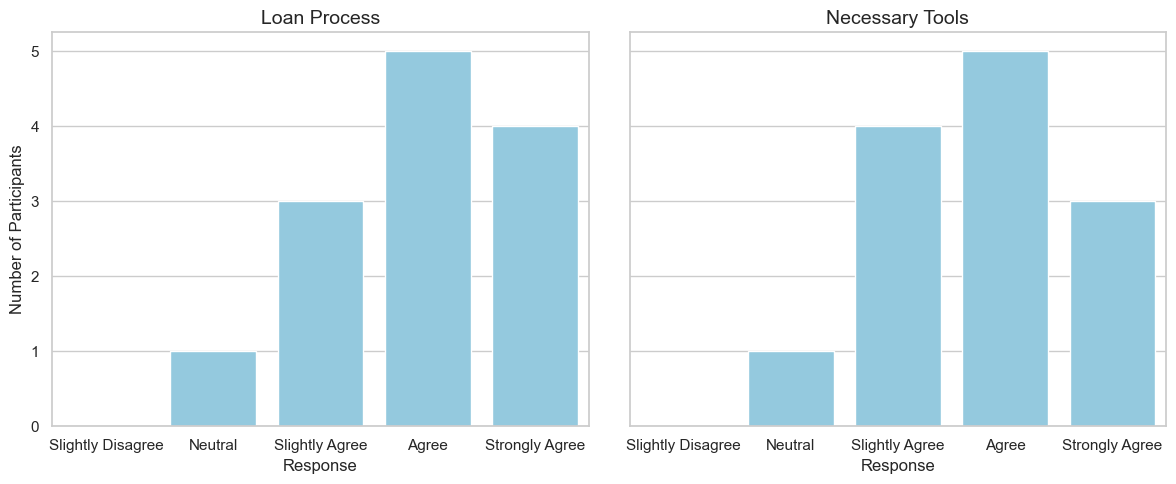

In [633]:
multi_plots(learning, 2, 'skyblue')
plt.tight_layout()
plt.show()

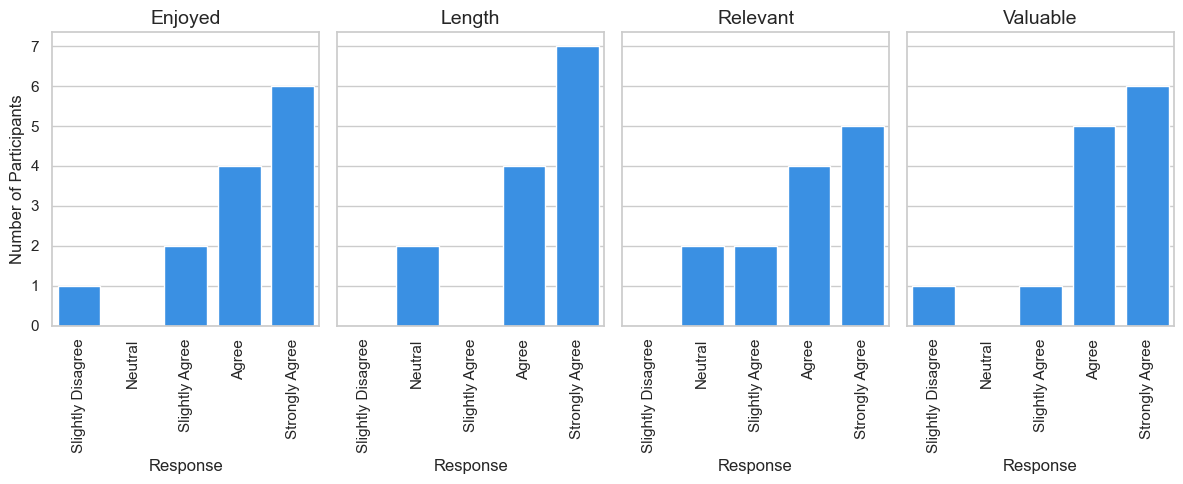

In [634]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 4, figsize=(12,5), sharey=True)

for i, j in enumerate(quality):
    data[j] = data[j].map(scale)
    frame = data[j].value_counts().reindex(order, fill_value=0).reset_index()
    frame.columns = ['Scale', 'Count']
    
    sns.barplot(data=frame, x='Scale', y='Count', ax=axes[i], color='dodgerblue')
    
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(j.replace("_", " ").title(), fontsize=14)
    axes[i].set_xlabel('Response')
    if i == 0:
        axes[i].set_ylabel('Number of Participants')


plt.tight_layout()
plt.show()

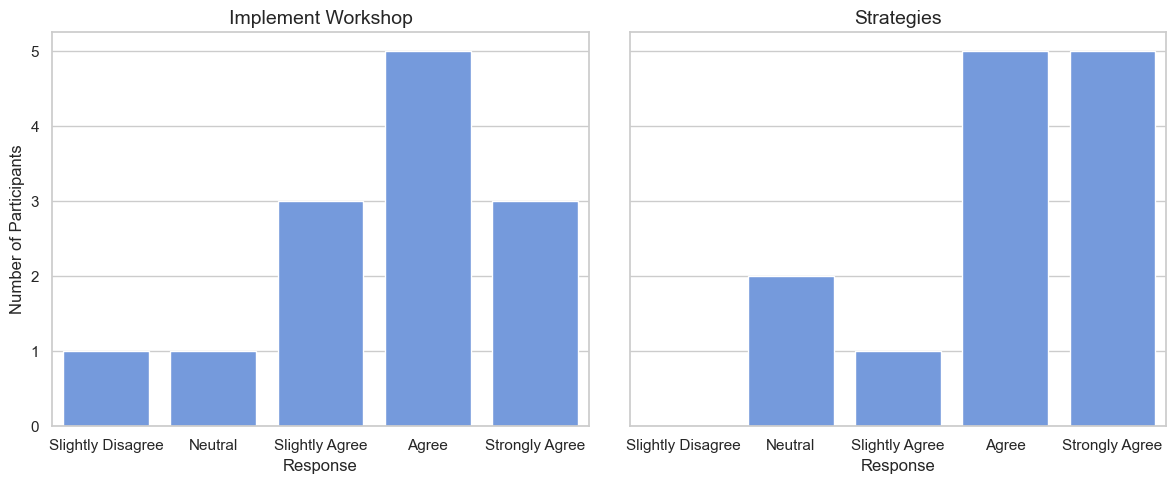

In [635]:
multi_plots(implement, 2, 'cornflowerblue')
plt.tight_layout()
plt.show()


| Comments  | Responses                                                |  
|-----------|----------------------------------------------|  
| How will use the information that you learned today?  | - I will likely apply next year this will help me develop my research trajectory. <br> - I will evaluate my options for applying to this program and potentially develop a grant application using the information provided. <br> - I probably won't--the only thing I learned was that LRP does not have to go through SPA. <br> to apply to LRP|  
| What was your overall impression of the workshop?  | - it was very accessible and welcoming <br> - The workshop is a great resource for the UCI research community. <br> - Poorly organized and the speakers were not prepped. No real flow of information or substantive strategies for applying. <br> - very well done; really liked that you had a panel of previous recipients|  
| Do you have any suggestions for improvement?    | - not at the moment perhaps as I apply. <br> - Instead of relying on random people who have had a LRP grant, bring in people who truly understand the various pieces of the application to provide strategies and offer assistance with different types of research. |  


## Insights and Feedback